In [8]:
# https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
# This script is fully based in above tutorial

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,10

In [13]:
data = pd.read_csv('../../datasets/prepared/parking-prepared.csv')

data['spots_available'] = pd.to_numeric(data['spots_available'])
data['verification_datetime'] = pd.to_datetime(data['verification_datetime'])
data = data.set_index('verification_datetime').asfreq('15min')
data.index = pd.DatetimeIndex(data.index, freq='15min')

data['spots_available'] = data['spots_available'].fillna(-1)
#data = data.dropna()

data

spots_available
verification_datetime                 
2016-10-02 05:30:00             5017.0
2016-10-02 05:45:00             5015.0
2016-10-02 06:00:00             5015.0
2016-10-02 06:15:00             5014.0
2016-10-02 06:30:00               -1.0
...                                ...
2017-04-21 22:45:00               -1.0
2017-04-21 23:00:00              739.0
2017-04-21 23:15:00               -1.0
2017-04-21 23:30:00              807.0
2017-04-21 23:45:00              843.0

[19370 rows x 1 columns]

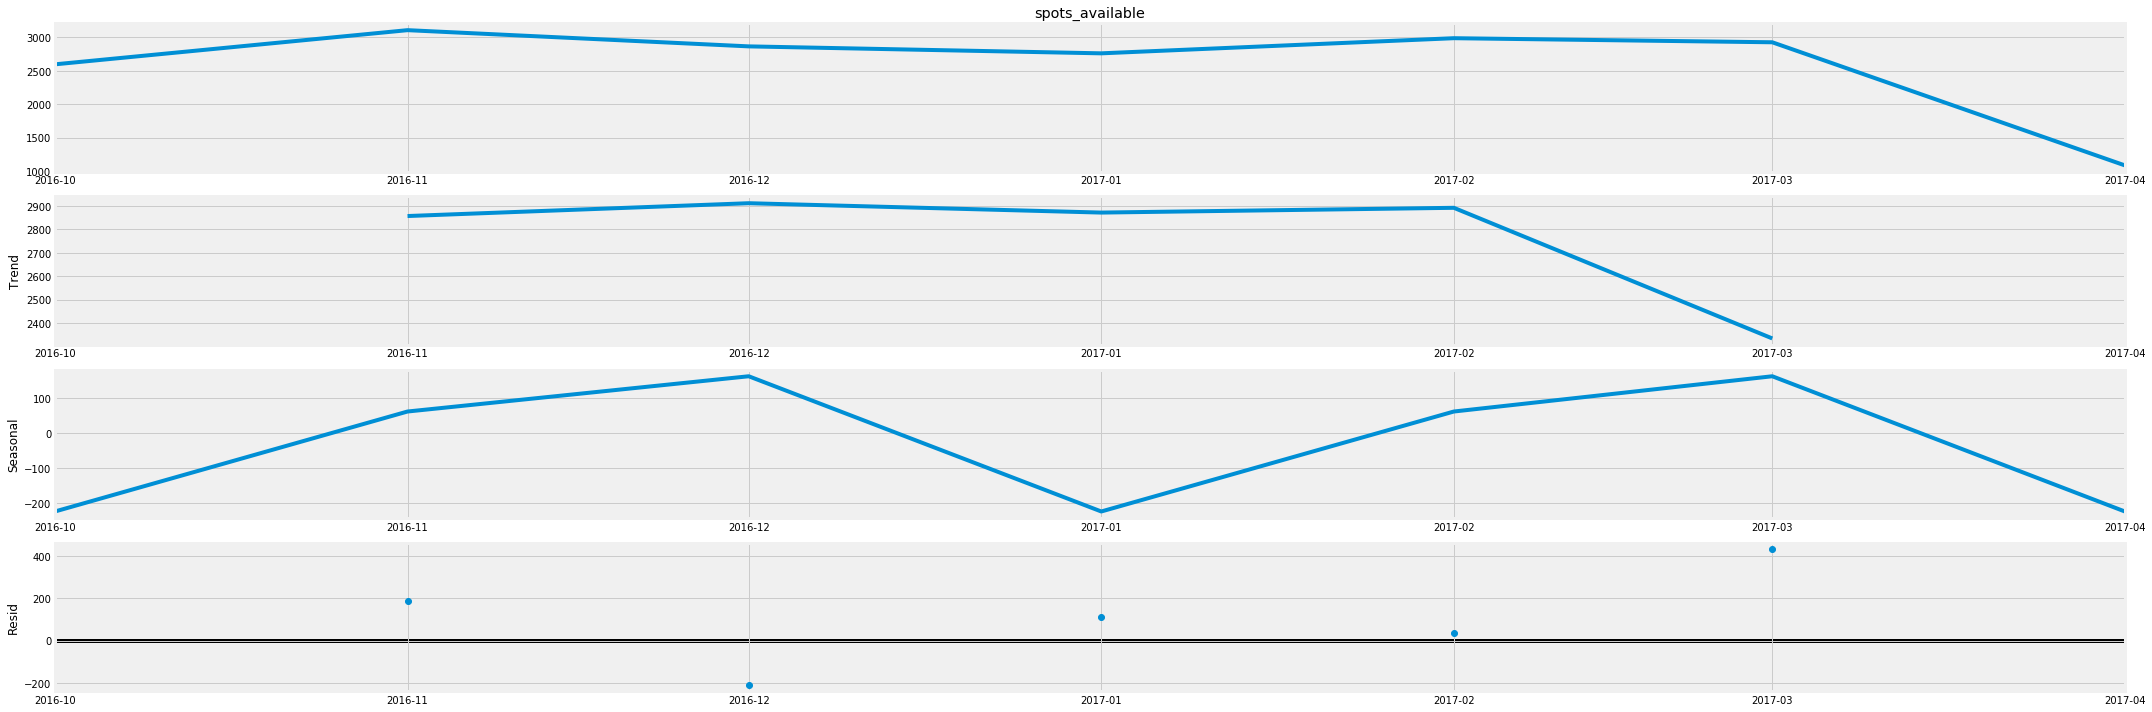

In [25]:
y = data['spots_available'].resample('MS').mean()

decomposition = sm.tsa.seasonal_decompose(y, model='additive', freq=3)
fig = decomposition.plot()
plt.show()

In [26]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
